# CMPT 898: Assigment 3 Solutions
## By Samuel Horovatin, sch923, 11185403

### 1. Baseline network: *You can start with a LeNet-5 style architecture that we discussed in the lecture. As a baseline start with ReLU activations for the hidden layers, and a softmax output layer.*

In [18]:
import tensorflow as tf
import numpy as np
import os, datetime
import math

# Hyper-parameters that remain constant throughout all questions
EPOCHS = 10
BATCH = 256
OPTIMIZER = 'adam'
LOSS = 'sparse_categorical_crossentropy'
METRICS = 'accuracy'

# Grab the Cifar10 dataset, which is a color image database consisiting of 
# 10 different classes representing airplanes, cars, birds, cats, deer, dogs, frogs, horses, ships, and trucks
(x_train, y_train),(x_test, y_test) = tf.keras.datasets.cifar10.load_data()

#Normalization of x_train and x_test and split into training dataset and testing dataset
x_train, x_test = x_train / 255.0, x_test / 255.0

In [21]:
# Trains the model given the constant parameters and returns the model and the fit history
def train_model(model):
  model.compile(optimizer=OPTIMIZER,
                loss=LOSS,
                metrics=[METRICS])

  logdir = os.path.join("logs", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
  tensorboard_callback = tf.keras.callbacks.TensorBoard(logdir, histogram_freq=1)
  history = model.fit(x=x_train, 
                      y=y_train, 
                      epochs=EPOCHS,
                      batch_size=BATCH, 
                      validation_data=(x_test, y_test),
                      callbacks=[tensorboard_callback])
        
  return (model, history)

In [22]:
# LeNet-5 as described in the lecture notes
def create_baseline_model():
  return tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(
        filters=6, 
        kernel_size=5, 
        activation='relu', 
        input_shape=(32, 32, 3)),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(
        filters=16,
        kernel_size=5, 
        activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(120, activation='relu'),
    tf.keras.layers.Dense(84, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')])

train_model(create_baseline_model())

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 4s 75us/sample - loss: 1.8135 - accuracy: 0.3341 - val_loss: 1.5938 - val_accuracy: 0.4144
Epoch 2/10
50000/50000 [==============================] - 2s 33us/sample - loss: 1.5326 - accuracy: 0.4406 - val_loss: 1.4665 - val_accuracy: 0.4620
Epoch 3/10
50000/50000 [==============================] - 2s 33us/sample - loss: 1.4215 - accuracy: 0.4843 - val_loss: 1.3687 - val_accuracy: 0.5021
Epoch 4/10
50000/50000 [==============================] - 2s 33us/sample - loss: 1.3361 - accuracy: 0.5205 - val_loss: 1.3609 - val_accuracy: 0.5099
Epoch 5/10
50000/50000 [==============================] - 2s 32us/sample - loss: 1.2859 - accuracy: 0.5408 - val_loss: 1.2744 - val_accuracy: 0.5431
Epoch 6/10
50000/50000 [==============================] - 2s 33us/sample - loss: 1.2176 - accuracy: 0.5674 - val_loss: 1.2301 - val_accuracy: 0.5588
Epoch 7/10
50000/50000 [==============================] 

(<tensorflow.python.keras.engine.sequential.Sequential at 0x1b1b88fa948>,
 <tensorflow.python.keras.callbacks.History at 0x1b1b8a80108>)

### 2. Add L2 weight decay regularization: *Add an L2-norm penalty on the weights of your baseline model as regularization. Test two different regularization strengths.*

In [23]:
# A model that applies an regularization function at a specific strength at every layer
# Reused by both question 2 and 3
def create_regularized_model(regularizer, reg_strength):
  return tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(
        filters=6, 
        kernel_size=5, 
        activation='relu', 
        input_shape=(32, 32, 3), 
        kernel_regularizer=regularizer(reg_strength)),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(
        filters=16,
        kernel_size=5, 
        activation='relu',
        kernel_regularizer=regularizer(reg_strength)),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(
        120,
        activation='relu',
        kernel_regularizer=regularizer(reg_strength)),
    tf.keras.layers.Dense(
        84,
        activation='relu',
        kernel_regularizer=regularizer(reg_strength)),
    tf.keras.layers.Dense(10,
        activation='softmax',
        kernel_regularizer=regularizer(reg_strength))])


In [24]:
LAMBDA1 = 0.001
LAMBDA2 = 0.01

print(f"Training model 1 with L2 regularization and a lambda of {LAMBDA1}")
train_model(create_regularized_model(tf.keras.regularizers.l2, LAMBDA1))
print(f"Training model 2 with L2 regularization and a lambda of {LAMBDA2}")
train_model(create_regularized_model(tf.keras.regularizers.l2, LAMBDA2))
%load_ext tensorboard
%tensorboard --logdir logs

Training model 1 with L2 regularization and a lambda of 0.001
Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 2s 49us/sample - loss: 2.0473 - accuracy: 0.3200 - val_loss: 1.7781 - val_accuracy: 0.4068
Epoch 2/10
50000/50000 [==============================] - 2s 34us/sample - loss: 1.6929 - accuracy: 0.4430 - val_loss: 1.6317 - val_accuracy: 0.4630
Epoch 3/10
50000/50000 [==============================] - 2s 34us/sample - loss: 1.5714 - accuracy: 0.4871 - val_loss: 1.5971 - val_accuracy: 0.4743
Epoch 4/10
50000/50000 [==============================] - 2s 34us/sample - loss: 1.5147 - accuracy: 0.5097 - val_loss: 1.5202 - val_accuracy: 0.5006
Epoch 5/10
50000/50000 [==============================] - 2s 33us/sample - loss: 1.4572 - accuracy: 0.5307 - val_loss: 1.4435 - val_accuracy: 0.5376
Epoch 6/10
50000/50000 [==============================] - 2s 34us/sample - loss: 1.4189 - accuracy: 0.5440 - val_loss: 1.4048 - val_accuracy: 0

Reusing TensorBoard on port 6006 (pid 22568), started 4:20:16 ago. (Use '!kill 22568' to kill it.)

### 3. Add L1 weight decay regularization: *Add an L1-norm penalty on the weights of your baseline model as regularization. Test two different regularization strengths.*

In [25]:
LAMBDA1 = 0.001
LAMBDA2 = 0.01

print(f"Training model 1 with L1 regularization and a lambda of {LAMBDA1}")
train_model(create_regularized_model(tf.keras.regularizers.l1, LAMBDA1))
print(f"Training model 2 with L1 regularization and a lambda of {LAMBDA2}")
train_model(create_regularized_model(tf.keras.regularizers.l1, LAMBDA2))
%load_ext tensorboard
%tensorboard --logdir logs

Training model 1 with L1 regularization and a lambda of 0.001
Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 3s 53us/sample - loss: 3.3868 - accuracy: 0.2844 - val_loss: 2.4437 - val_accuracy: 0.3576
Epoch 2/10
50000/50000 [==============================] - 2s 37us/sample - loss: 2.2775 - accuracy: 0.3747 - val_loss: 2.1612 - val_accuracy: 0.3879
Epoch 3/10
50000/50000 [==============================] - 2s 33us/sample - loss: 2.0875 - accuracy: 0.4052 - val_loss: 2.0407 - val_accuracy: 0.4130
Epoch 4/10
50000/50000 [==============================] - 2s 35us/sample - loss: 1.9891 - accuracy: 0.4191 - val_loss: 1.9725 - val_accuracy: 0.4208
Epoch 5/10
50000/50000 [==============================] - 2s 34us/sample - loss: 1.9245 - accuracy: 0.4306 - val_loss: 1.9064 - val_accuracy: 0.4290
Epoch 6/10
50000/50000 [==============================] - 2s 35us/sample - loss: 1.8841 - accuracy: 0.4361 - val_loss: 1.8927 - val_accuracy: 0

Reusing TensorBoard on port 6006 (pid 22568), started 4:21:01 ago. (Use '!kill 22568' to kill it.)

### 4. Remove fully-connected layers: *Modify the architecture to remove the fully-connected layers at the backend of the network. For example, replace with Global Average Pooling or an alternative. Report the change in the number of parameters for this model compared to previous.*


In [26]:
#A model that applies an L1 regularization at every layer
def create_average_pooling_model():
  return tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(
        filters=6, 
        kernel_size=5, 
        activation='relu', 
        input_shape=(32, 32, 3)),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(
        filters=16,
        kernel_size=5, 
        activation='relu'),
    tf.keras.layers.GlobalAveragePooling2D()])

print(f"Training model with Global Average Pooling")
train_model(create_average_pooling_model())

%load_ext tensorboard
%tensorboard --logdir logs

Training model with Global Average Pooling
Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 2s 44us/sample - loss: 2.2044 - accuracy: 0.1783 - val_loss: 2.0029 - val_accuracy: 0.2382
Epoch 2/10
50000/50000 [==============================] - 2s 33us/sample - loss: 1.9097 - accuracy: 0.2923 - val_loss: 1.8011 - val_accuracy: 0.3165
Epoch 3/10
50000/50000 [==============================] - 2s 34us/sample - loss: 1.8759 - accuracy: 0.3066 - val_loss: 1.7741 - val_accuracy: 0.3537
Epoch 4/10
50000/50000 [==============================] - 2s 33us/sample - loss: 1.8432 - accuracy: 0.3109 - val_loss: 1.8428 - val_accuracy: 0.3051
Epoch 5/10
50000/50000 [==============================] - 2s 33us/sample - loss: 1.7901 - accuracy: 0.3367 - val_loss: 1.7388 - val_accuracy: 0.3531
Epoch 6/10
50000/50000 [==============================] - 2s 33us/sample - loss: 1.7561 - accuracy: 0.3547 - val_loss: 1.7200 - val_accuracy: 0.3775
Epoch 7/10
50

Reusing TensorBoard on port 6006 (pid 22568), started 4:21:22 ago. (Use '!kill 22568' to kill it.)

### 5. Analyze the accuracy of the different models: *For all six models, train/test your model three times to get a sense of the consistency of the test error. Keep other aspects of your model the same among designs (# epochs, mini-batch size, hyperparameters). Generate a table that summarizes the training error, test error, standard deviation of test error across three runs, inference time, and \# of parameters for each model.*

In [27]:
# Training for 6 models of 10 epochs each takes alot of time, so actual tabulation is done in another code block

# Chosen based on performance of the above model test for L1 and L2
LAMBDA1 = 0.001
LAMBDA2 = 0.01

model_results = {"baseline":list(),"l2_lambda1":list(),"l1_lambda1":list(),"l2_lambda2":list(),"l1_lambda2":list(),"global_average_pooling":list()}

for i in range(3):
    # Train and store the baseline model results
    print("BASELINE Model Training: ...")
    model_results["baseline"].append(train_model(create_baseline_model()))

    # Train and store the L2 model results with both LAMBDA values
    print("L2 Model Training: ...")
    model_results["l2_lambda1"].append(train_model(create_regularized_model(tf.keras.regularizers.l2, LAMBDA1)))
    model_results["l2_lambda2"].append(train_model(create_regularized_model(tf.keras.regularizers.l2, LAMBDA2)))

    # Train and store the L1 model results with both LAMBDA values
    print("L1 Model Training: ...")
    model_results["l1_lambda1"].append(train_model(create_regularized_model(tf.keras.regularizers.l1, LAMBDA1)))
    model_results["l1_lambda2"].append(train_model(create_regularized_model(tf.keras.regularizers.l1, LAMBDA2)))

    # Train and store the global_average_pooling model results
    print("Global Average Pooling Model Training: ...")
    model_results["global_average_pooling"].append(train_model(create_average_pooling_model()))

 - loss: 2.0045 - accuracy: 0.2568 - val_loss: 1.9144 - val_accuracy: 0.3019
Epoch 3/10
50000/50000 [==============================] - 2s 36us/sample - loss: 2.0860 - accuracy: 0.2167 - val_loss: 2.2489 - val_accuracy: 0.1004
Epoch 4/10
50000/50000 [==============================] - 2s 32us/sample - loss: 2.1919 - accuracy: 0.1007 - val_loss: 2.1184 - val_accuracy: 0.1013
Epoch 5/10
50000/50000 [==============================] - 2s 33us/sample - loss: 2.0633 - accuracy: 0.1580 - val_loss: 1.9133 - val_accuracy: 0.2904
Epoch 6/10
50000/50000 [==============================] - 2s 35us/sample - loss: 1.8808 - accuracy: 0.3002 - val_loss: 1.8391 - val_accuracy: 0.3109
Epoch 7/10
50000/50000 [==============================] - 2s 34us/sample - loss: 1.9041 - accuracy: 0.2914 - val_loss: 1.8529 - val_accuracy: 0.3160
Epoch 8/10
50000/50000 [==============================] - 2s 35us/sample - loss: 1.9977 - accuracy: 0.2447 - val_loss: 2.0025 - val_accuracy: 0.2368
Epoch 9/10
50000/50000 [=====

Starting table creation...
Currently populating row for [baseline]...
Currently populating row for [l2_lambda1]...
Currently populating row for [l1_lambda1]...
Currently populating row for [l2_lambda2]...
Currently populating row for [l1_lambda2]...
Currently populating row for [global_average_pooling]...


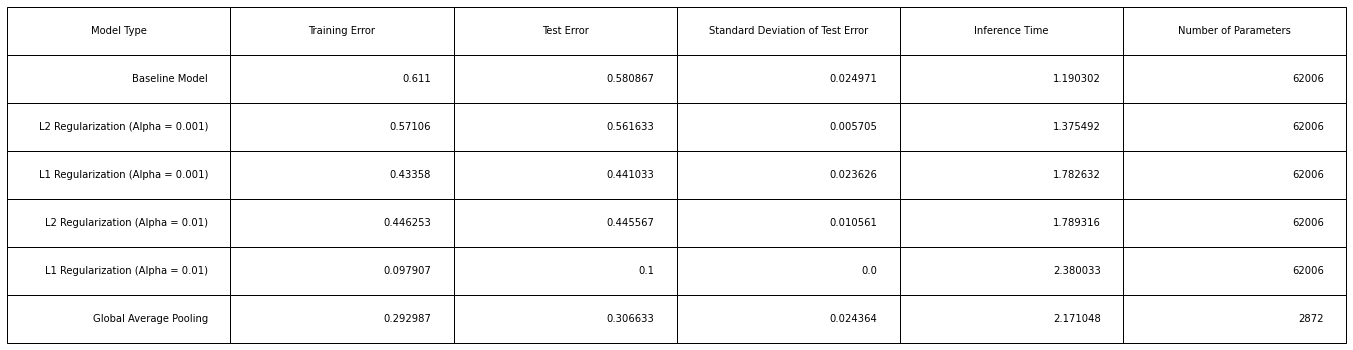

In [49]:
import pandas as pd
import matplotlib.pyplot as plt
import statistics as stat

# Data assembly
table_label = ("Model Type", "Training Error", "Test Error", "Standard Deviation of Test Error", "Inference Time", "Number of Parameters")
table_rows = list()

print("Starting table creation...")
for (key, model_list) in model_results.items():
    row_data = {"training_error" : list(), "test_error" : list(), "inference_time" : list()}

    print(f"Currently populating row for [{key}]...")
    # Gets training accuracy and test accuracy
    for (model, hist) in model_list:
        row_data["training_error"].append(float(hist.history['accuracy'][EPOCHS-1]))
        row_data["test_error"].append(float(hist.history['val_accuracy'][EPOCHS-1]))
        row_data["inference_time"].append(float(model.evaluate(x_test, y_test, verbose=0)[0]))

    # Adds all values to row for table creation 
    nice_keys = {"baseline": "Baseline Model","l2_lambda1": f"L2 Regularization (Alpha = {LAMBDA1})","l1_lambda1":f"L1 Regularization (Alpha = {LAMBDA1})","l2_lambda2": f"L2 Regularization (Alpha = {LAMBDA2})","l1_lambda2": f"L1 Regularization (Alpha = {LAMBDA2})","global_average_pooling": f"Global Average Pooling"}
    table_rows.append((nice_keys[key], 
    round(stat.mean(row_data["training_error"]), 6), 
    round(stat.mean(row_data["test_error"]), 6), 
    round(stat.stdev(row_data["test_error"]), 6), 
    round(stat.mean(row_data["inference_time"]), 6), 
    int(model_results[key][0][0].count_params())
    ))
   

# Create table
fig, axes = plt.subplots()

# Hides unneeded axes
fig.patch.set_visible(False)
axes.axis('off')
axes.axis('tight')

table_df = pd.DataFrame(table_rows, columns=table_label)
 
# Plot table with some formatting
table = axes.table(cellText=table_df.values, colLabels=table_df.columns, loc='center')
table.scale(4,4)
plt.show()


### 6. Analyze the weights of the regularized models: *For the baseline model and the four regularized models (from parts 2 and 3: L2 and L1 regularization with two different strengths each) measure the sparsity of the weights in each FC layer and create a bar chart that compares the sparsity between the models in each layer. There are a number of metrics that measure sparsity, e.g. Hoyer's index. For different sparsity metrics, see Table I in https://arxiv.org/abs/0811.4706*